In [1]:
import json
import requests
#from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Required for formatting dates later in the case
import datetime
import matplotlib.dates as mdates

In [2]:
# Load a file as a DataFrame and assign to df
df = pd.read_excel("Data/Mediciones de peso y talla.xlsx")

In [3]:
# Visualizar las llaves, para editarlas
df.keys()

Index(['DS_IDENTIFICACION', 'FE_alta', 'NM_IMC', 'NM_PESO', 'NM_TALLA',
       'Clasificacion_IMC'],
      dtype='object')

In [4]:
# Se pasan los indices de las columnas a minusculas y se renombrar los nombres de las columnas
col = np.char.lower(np.array(df.keys(), dtype = 'U'))
col[0] = 'id'
col[1] = 'fecha'
col[2] = 'imc'
df.columns = col

In [5]:
df.keys()

Index(['id', 'fecha', 'imc', 'nm_peso', 'nm_talla', 'clasificacion_imc'], dtype='object')

In [6]:
# se observa la informacion del df, para corroborar el tipo de dato de cada una de las columnas.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12515 entries, 0 to 12514
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 12515 non-null  int64         
 1   fecha              12515 non-null  datetime64[ns]
 2   imc                12515 non-null  float64       
 3   nm_peso            12515 non-null  float64       
 4   nm_talla           12515 non-null  int64         
 5   clasificacion_imc  12515 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 586.8+ KB


In [7]:
df

,id,fecha,imc,nm_peso,nm_talla,clasificacion_imc
0,535255,2010-10-26,15.62,15.0,98,Bajo peso
1,1769865,2010-10-29,19.38,58.0,173,Normal
2,535255,2010-10-26,18.74,18.0,98,Normal
3,1769865,2010-12-03,20.28,60.0,172,Normal
4,535255,2010-12-29,18.74,18.0,98,Normal
...,...,...,...,...,...,...
12510,1019393,2020-05-20,24.01,63.0,162,Normal
12511,1216245,2020-05-22,36.93,103.0,167,Obesidad tipo II
12512,1827409,2020-05-22,30.98,69.7,150,Obesidad tipo I
12513,1311280,2020-05-26,17.58,45.0,160,Bajo peso


### IMC
El IMC es una relacion entre el peso y la talla y por ello, se eliminaran dichas columnas dejando solo el IMC que es el dato relevante para analisis.
`https://www.texasheart.org/heart-health/heart-information-center/topics/calculadora-del-indice-de-masa-corporal-imc/`

In [8]:
# Se eliminan las columnas que no tiene relevancia para el caso
df = df.drop(columns=['nm_peso', 'nm_talla'])

In [9]:
df

,id,fecha,imc,clasificacion_imc
0,535255,2010-10-26,15.62,Bajo peso
1,1769865,2010-10-29,19.38,Normal
2,535255,2010-10-26,18.74,Normal
3,1769865,2010-12-03,20.28,Normal
4,535255,2010-12-29,18.74,Normal
...,...,...,...,...
12510,1019393,2020-05-20,24.01,Normal
12511,1216245,2020-05-22,36.93,Obesidad tipo II
12512,1827409,2020-05-22,30.98,Obesidad tipo I
12513,1311280,2020-05-26,17.58,Bajo peso


## ID analisis ##

In [10]:
id_df = pd.DataFrame(df["id"].value_counts()).reset_index()
id_df.columns = ['id', 'count']
print(id_df['count'].sum())
id_df

12515


,id,count
0,1769865,125
1,535255,122
2,758174,113
3,1263688,113
4,1263349,109
...,...,...
789,934268,1
790,1980742,1
791,1534337,1
792,557377,1


## IMC Analisis ##

In [11]:
imc_df = pd.DataFrame(df["clasificacion_imc"].value_counts()).reset_index()
imc_df.columns = ['Clasificacion', 'count']
imc_df

,Clasificacion,count
0,Normal,5221
1,Sobrepeso,4347
2,Obesidad tipo I,1610
3,Bajo peso,1075
4,Obesidad tipo II,235
5,Obesidad tipo III,27


Otra forma de visualizar la informacion general del imc es:

`imc1_df = pd.DataFrame(df[["clasificacion_imc", "nm_imc"]].groupby("clasificacion_imc").describe())
imc1_df`

In [12]:
imc_df = pd.DataFrame(df[["clasificacion_imc", "imc"]].groupby("clasificacion_imc").agg(['count', 'min', 'max']))
imc_df

imc              
                  count    min    max
clasificacion_imc                    
Bajo peso          1075  10.67  18.49
Normal             5221  18.50  24.99
Obesidad tipo I    1610  30.00  34.97
Obesidad tipo II    235  35.03  39.95
Obesidad tipo III    27  40.00  87.70
Sobrepeso          4347  25.00  29.99

## recortando el dataframe:

In [13]:
df.drop_duplicates().reset_index(drop=True)

,id,fecha,imc,clasificacion_imc
0,535255,2010-10-26,15.62,Bajo peso
1,1769865,2010-10-29,19.38,Normal
2,535255,2010-10-26,18.74,Normal
3,1769865,2010-12-03,20.28,Normal
4,535255,2010-12-29,18.74,Normal
...,...,...,...,...
12510,1019393,2020-05-20,24.01,Normal
12511,1216245,2020-05-22,36.93,Obesidad tipo II
12512,1827409,2020-05-22,30.98,Obesidad tipo I
12513,1311280,2020-05-26,17.58,Bajo peso


In [14]:
df[df['clasificacion_imc'] == "Normal"]

,id,fecha,imc,clasificacion_imc
1,1769865,2010-10-29,19.38,Normal
2,535255,2010-10-26,18.74,Normal
3,1769865,2010-12-03,20.28,Normal
4,535255,2010-12-29,18.74,Normal
5,1769865,2011-01-05,20.28,Normal
...,...,...,...,...
12496,1515210,2020-04-16,23.23,Normal
12497,1019393,2020-04-20,21.97,Normal
12505,1346990,2020-04-29,22.03,Normal
12507,923858,2020-05-04,20.44,Normal


## Analisis Fecha##

In [15]:
date_df = pd.DataFrame(df["fecha"].value_counts()).reset_index()
date_df.columns = ['fecha', 'count']
date_df = date_df.sort_values(by=['count']).reset_index(drop = True)
date_df.tail()

,fecha,count
2241,2017-06-27,30
2242,2017-08-22,30
2243,2017-10-27,31
2244,2017-03-23,33
2245,2017-04-21,33


Text(0, 0.5, 'preguntas')

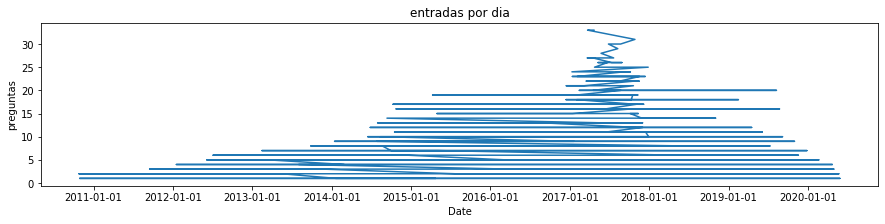

In [16]:
fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(date_df["fecha"], date_df["count"])
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))  # format x-axis display
plt.title("entradas por dia")
plt.xlabel("Date")
plt.ylabel("preguntas")